In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\DATA ANALYTICS2\Desktop\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

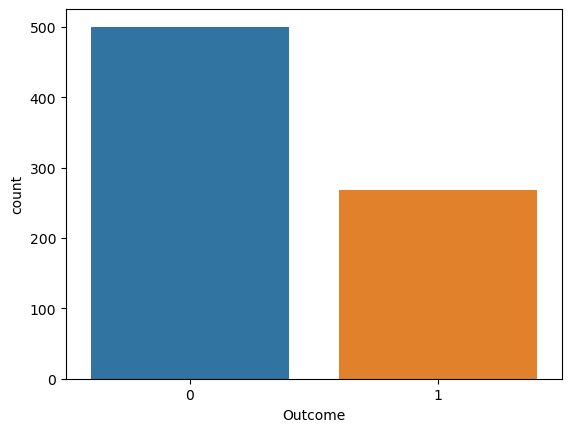

In [5]:
sns.countplot(x=y);

In [6]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=1)

In [9]:
x.shape

(768, 8)

In [10]:
x_train.shape

(576, 8)

In [11]:
x_test.shape

(192, 8)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [14]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [16]:
y_pred = knn.predict(x_test)

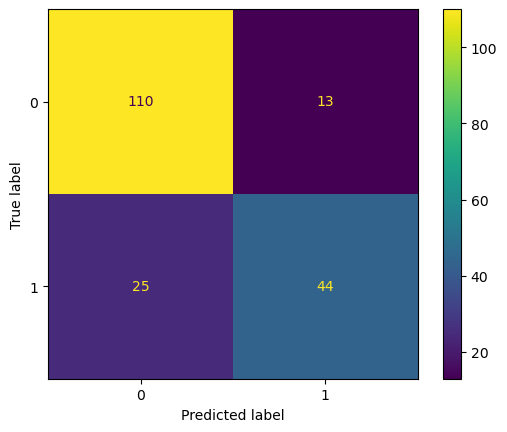

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.77      0.64      0.70        69

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
error = []
for k in range (1,41):
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(x_train, y_train)
 pred=knn.predict(x_test)
 error.append(np.mean(pred!=y_test))

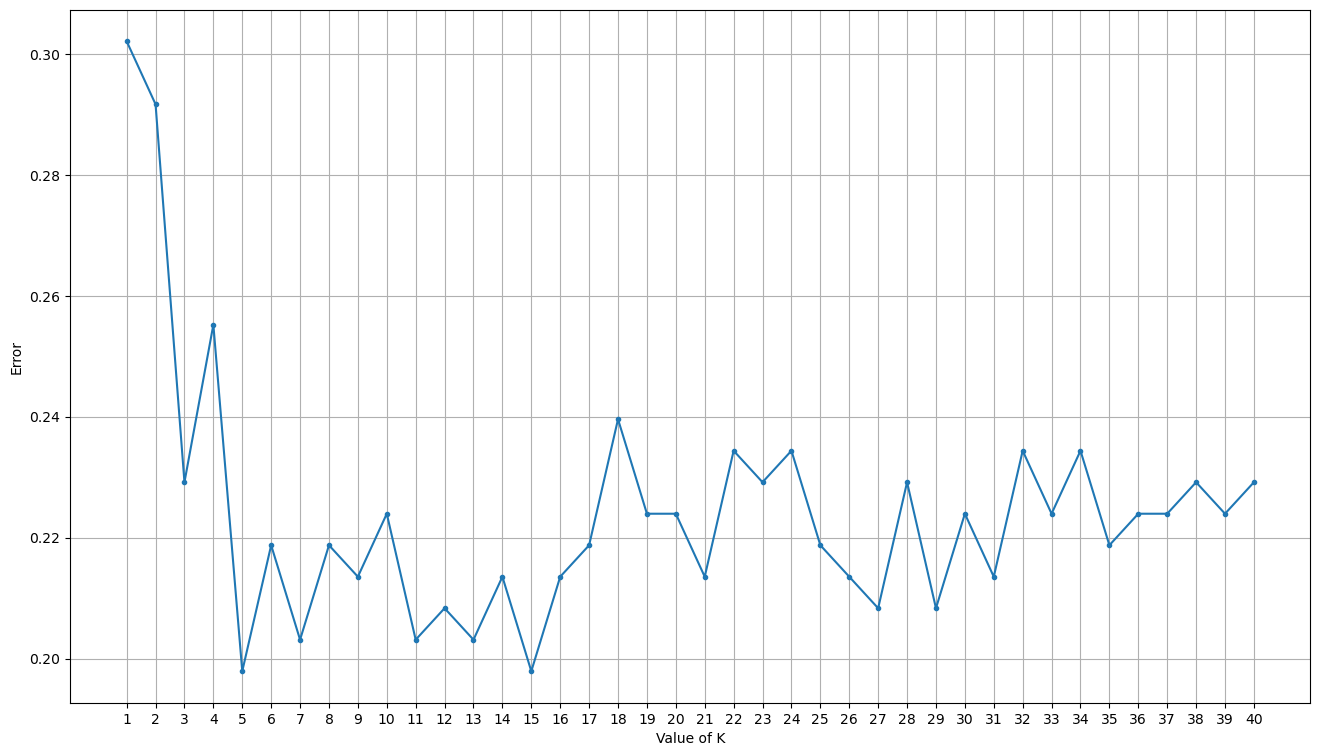

In [21]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')

In [22]:
knn = KNeighborsClassifier(n_neighbors = 33) 

In [23]:
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=33)

In [24]:
y_pred=knn.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       123
           1       0.80      0.51      0.62        69

    accuracy                           0.78       192
   macro avg       0.78      0.72      0.73       192
weighted avg       0.78      0.78      0.76       192

